In [ ]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [ ]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
# len(colnames)

In [ ]:
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
import io

f = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/dataset.zip').read()
zip_file = ZipFile(io.BytesIO(f))

train_df = pd.read_csv(zip_file.open('kddcup.csv'),header = None,names = colnames)
print("train_df shape -> ",train_df.shape)
test_df = pd.read_csv(zip_file.open('corrected.csv'),header = None,names = colnames)
print("test_df shape -> ",test_df.shape)

train_df shape ->  (494021, 42)
test_df shape ->  (311029, 42)


In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
train_df.isnull().sum() 
#so no data is null in train_df

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [ ]:
test_df.isnull().sum()
#so no data is null in test_df

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [ ]:
pd.Series(train_df.protocol_type.value_counts(ascending=True))

udp      20354
tcp     190065
icmp    283602
Name: protocol_type, dtype: int64

In [ ]:
pd.Series(test_df.protocol_type.value_counts(ascending=True))

udp      26703
tcp     119357
icmp    164969
Name: protocol_type, dtype: int64

In [ ]:
pd.Series(train_df.result.value_counts(ascending=True))

spy.                     2
perl.                    3
phf.                     4
multihop.                7
ftp_write.               8
loadmodule.              9
rootkit.                10
imap.                   12
warezmaster.            20
land.                   21
buffer_overflow.        30
guess_passwd.           53
nmap.                  231
pod.                   264
teardrop.              979
warezclient.          1020
portsweep.            1040
ipsweep.              1247
satan.                1589
back.                 2203
normal.              97278
neptune.            107201
smurf.              280790
Name: result, dtype: int64

#Distribution of Attacks

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

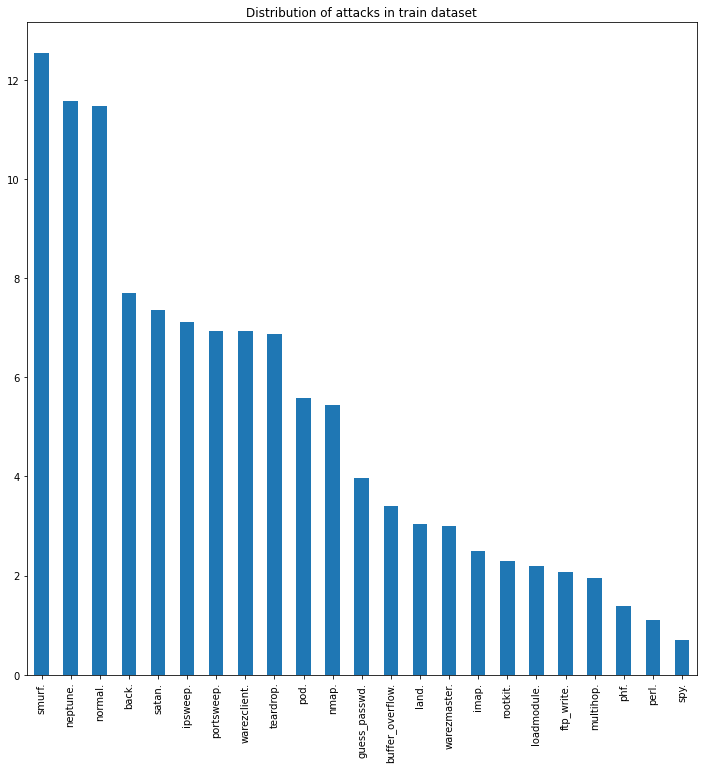

In [ ]:
plt.clf()
plt.figure(figsize = (12,12))
plt.title("Distribution of attacks in train dataset")
train_df['result'].value_counts().apply(np.log).plot(kind = 'bar')
plt.show

In [ ]:
pd.Series(test_df.result.value_counts(ascending=True))

imap.                    1
sqlattack.               2
phf.                     2
loadmodule.              2
udpstorm.                2
perl.                    2
worm.                    2
ftp_write.               3
xsnoop.                  4
xlock.                   9
land.                    9
teardrop.               12
rootkit.                13
xterm.                  13
ps.                     16
named.                  17
sendmail.               17
multihop.               18
buffer_overflow.        22
nmap.                   84
pod.                    87
httptunnel.            158
ipsweep.               306
portsweep.             354
saint.                 736
processtable.          759
apache2.               794
mscan.                1053
back.                 1098
warezmaster.          1602
satan.                1633
snmpguess.            2406
guess_passwd.         4367
mailbomb.             5000
snmpgetattack.        7741
neptune.             58001
normal.              60593
s

In [ ]:
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [ ]:
# X = train_df.loc[:,features]
# y = test_df.loc[:,target]

In [ ]:
# classes = np.unique(y)
# print(classes)

In [ ]:
train_df["result"] = np.where(train_df.result == "normal.",1,0)

In [ ]:
test_df["result"] = np.where(test_df.result == "normal.",1,0)

In [ ]:
# test_df["result"] = test_df["result"].replace(["normal."],1)
# test_df["result"] = test_df["result"].replace(['apache2.','back.','buffer_overflow.','ftp_write.','guess_passwd.','httptunnel.','imap.','ipsweep.','land.','loadmodule.','mailbomb.','mscan.','multihop.','named.','neptune.','nmap.','perl.','phf.','pod.','portsweep.','processtable.','ps.','rootkit.','saint.','satan.','sendmail.','smurf.','snmpgetattack.','snmpguess.','sqlattack.','teardrop.','udpstorm.','warezmaster.','worm.','xlock.','xsnoop.','xterm.'],0)

In [ ]:
pd.Series(train_df.result.value_counts(ascending=True))
#around 20% data is normal and remaining is attack

1     97278
0    396743
Name: result, dtype: int64

In [ ]:
pd.Series(test_df.result.value_counts(ascending=True))
#around 20% data is normal and remaining is attack

1     60593
0    250436
Name: result, dtype: int64

In [ ]:
# f_temp = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/kddcup%20(1).data.zip').read()
# zip_file_temp = ZipFile(io.BytesIO(f_temp))

# df = pd.read_csv(zip_file_temp.open('kddcup (1).data'),header = None,names = colnames)
# print("df shape -> ",df.shape)

In [ ]:
# pd.Series(df.protocol_type.value_counts(ascending=True))

In [ ]:
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
# df["result"] = np.where(df.result == "normal.",1,0)

In [ ]:
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
# df_normal = df[df["result"] == "normal."]

In [ ]:
# df_normal.to_csv("kdd_normal.csv")

#Oversampling 

In [ ]:
def oversampling(df):
  classes = df.result.value_counts().to_dict()
  most = max(classes.values())
  classes_list = []
  for key in classes:
    classes_list.append(df[df['result'] == key])
  classes_sample = []
  for i in range(1,len(classes_list)):
    classes_sample.append(classes_list[i].sample(most,replace = True))
  df_maybe = pd.concat(classes_sample)
  final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
  final_df = final_df.reset_index(drop=True)
  return final_df

In [ ]:
# df = oversampling(df)

In [ ]:
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
# train_df = oversampling(train_df)

In [ ]:
# pd.Series(train_df.result.value_counts(ascending=True))

In [ ]:
# pd.Series(train_df.protocol_type.value_counts(ascending=True))

In [ ]:
# icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]

In [ ]:
# x = icmp_df.loc[:,features]
# Y = icmp_df.loc[:,target]

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,Y_train,Y_test = train_test_split(x, Y, random_state=1, test_size=0.3)

In [ ]:
icmp_train_df = train_df[train_df.loc[:,"protocol_type"] == "icmp"]
icmp_test_df = test_df[test_df.loc[:,"protocol_type"] == "icmp"]
pd.Series(icmp_train_df.result.value_counts(ascending=True))

1      1288
0    282314
Name: result, dtype: int64

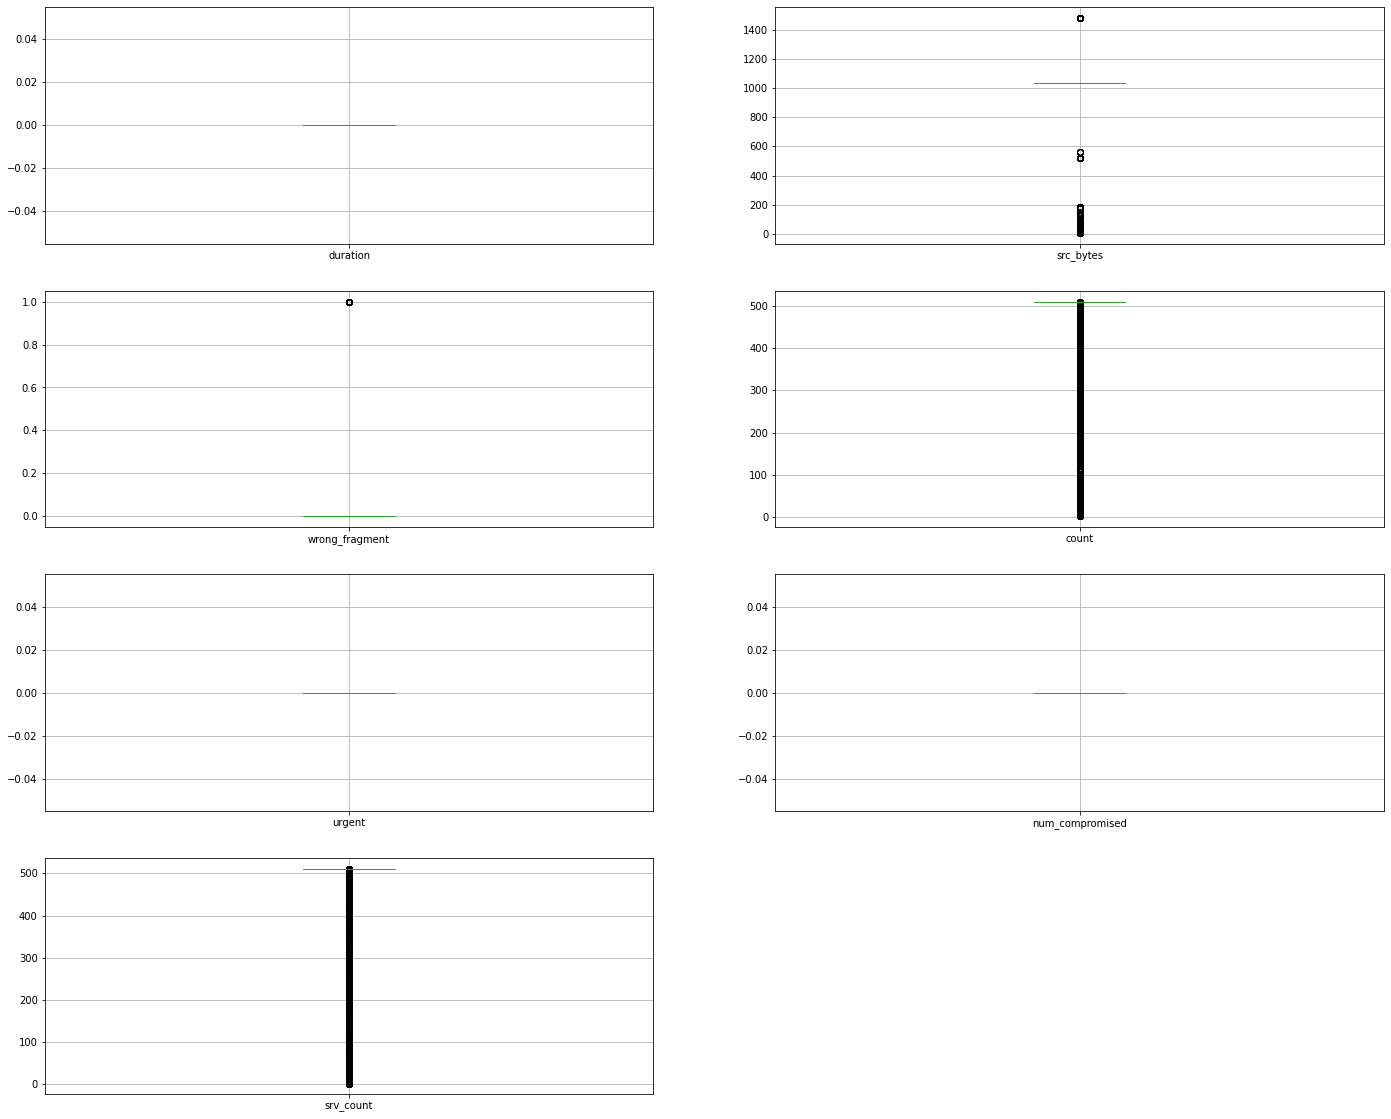

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(4,2,1)
fig = icmp_train_df.boxplot(column='duration')
# "duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"
plt.subplot(4,2,2)
fig = icmp_train_df.boxplot(column='src_bytes')
plt.subplot(4,2,3)
fig = icmp_train_df.boxplot(column='wrong_fragment')
plt.subplot(4,2,4)
fig = icmp_train_df.boxplot(column='count')
plt.subplot(4,2,5)
fig = icmp_train_df.boxplot(column='urgent')
plt.subplot(4,2,6)
fig = icmp_train_df.boxplot(column='num_compromised')
plt.subplot(4,2,7)
fig = icmp_train_df.boxplot(column='srv_count')

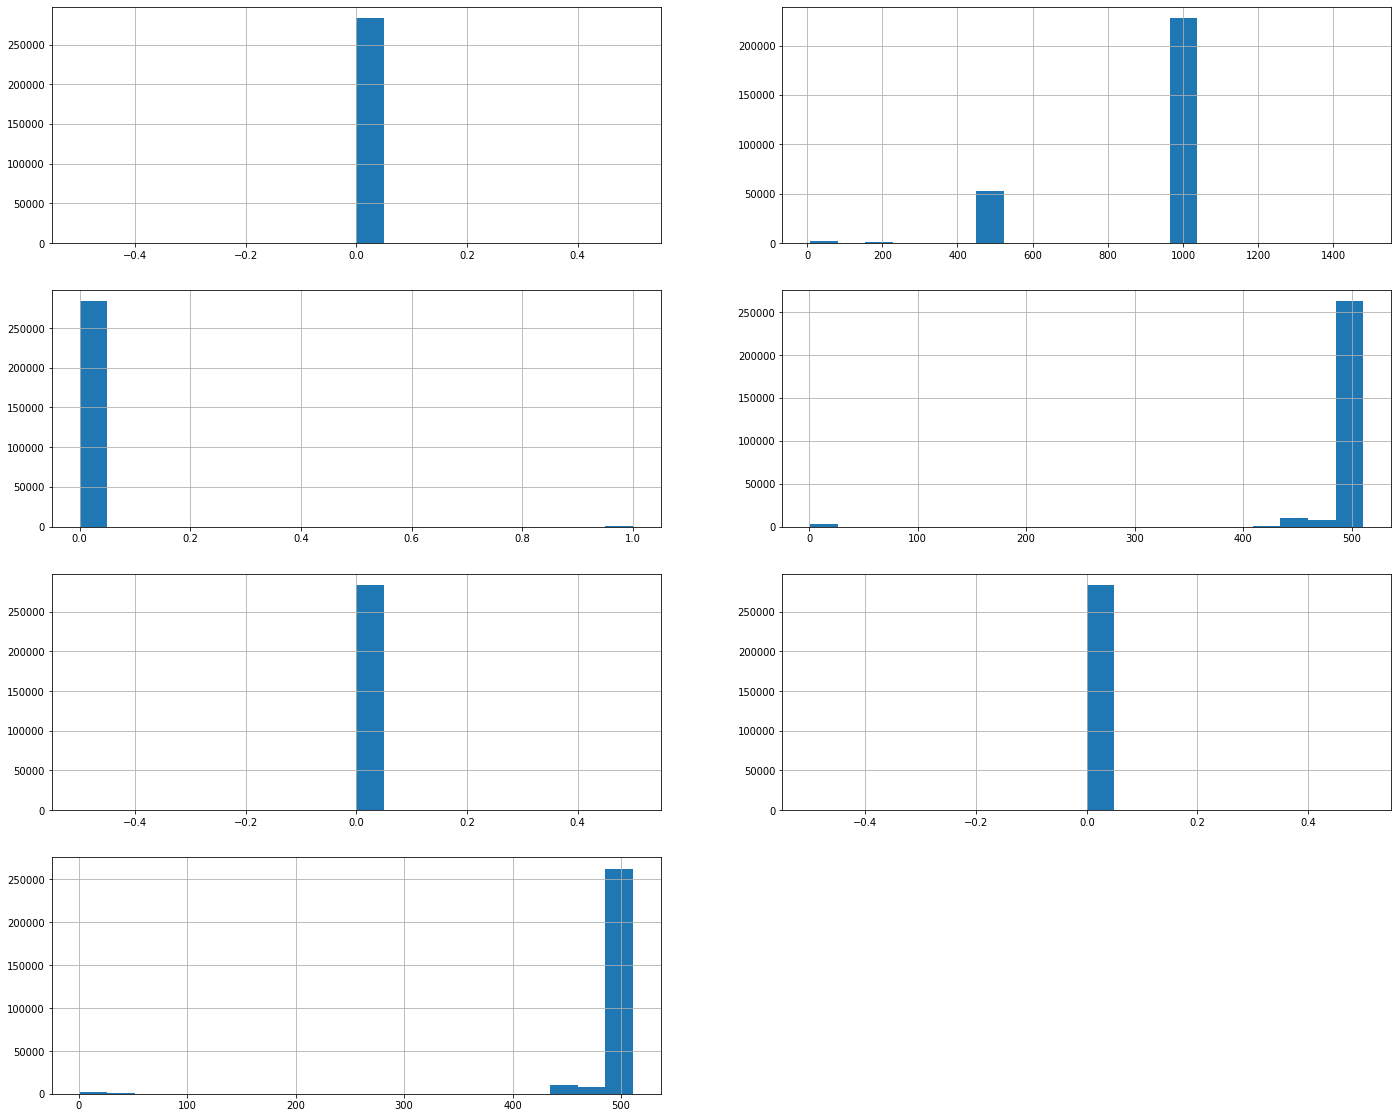

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(4,2,1)
fig = icmp_train_df['duration'].hist(bins=20)
# "duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"
plt.subplot(4,2,2)
fig = icmp_train_df['src_bytes'].hist(bins=20)
plt.subplot(4,2,3)
fig = icmp_train_df['wrong_fragment'].hist(bins=20)
plt.subplot(4,2,4)
fig = icmp_train_df['count'].hist(bins=20)
plt.subplot(4,2,5)
fig = icmp_train_df['urgent'].hist(bins=20)
plt.subplot(4,2,6)
fig = icmp_train_df['num_compromised'].hist(bins=20)
plt.subplot(4,2,7)
fig = icmp_train_df['srv_count'].hist(bins=20)

In [ ]:
icmp_train_df = oversampling(icmp_train_df)
pd.Series(icmp_train_df.result.value_counts(ascending=True))

0    282314
1    282314
Name: result, dtype: int64

In [ ]:
pd.Series(icmp_test_df.result.value_counts(ascending=True))

1       378
0    164591
Name: result, dtype: int64

In [ ]:
tcp_train_df = train_df[train_df.loc[:,"protocol_type"] == "tcp"]
tcp_test_df = test_df[test_df.loc[:,"protocol_type"] == "tcp"]
pd.Series(tcp_train_df.result.value_counts(ascending=True))

1     76813
0    113252
Name: result, dtype: int64

In [ ]:
tcp_train_df = oversampling(tcp_train_df)
pd.Series(tcp_train_df.result.value_counts(ascending=True))

0    113252
1    113252
Name: result, dtype: int64

In [ ]:
pd.Series(tcp_test_df.result.value_counts(ascending=True))

1    44118
0    75239
Name: result, dtype: int64

In [ ]:
udp_train_df = train_df[train_df.loc[:,"protocol_type"] == "udp"]
udp_test_df = test_df[test_df.loc[:,"protocol_type"] == "udp"]
pd.Series(udp_train_df.result.value_counts(ascending=True))

0     1177
1    19177
Name: result, dtype: int64

In [ ]:
udp_train_df = oversampling(udp_train_df)
pd.Series(udp_train_df.result.value_counts(ascending=True))

0    19177
1    19177
Name: result, dtype: int64

In [ ]:
pd.Series(udp_test_df.result.value_counts(ascending=True))

0    10606
1    16097
Name: result, dtype: int64

In [ ]:
def train_test(df_train,df_test):
  x_train = df_train.loc[:,features]
  Y_train = df_train.loc[:,target]
  x_test = df_test.loc[:,features]
  Y_test = df_test.loc[:,target]
  return x_train,Y_train,x_test,Y_test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

In [ ]:
def model_testing(x_train,Y_train,x_test,Y_test):
  for model in models:
      model.fit(x_train,Y_train)
      Y_pred = model.predict(x_test)
      score = accuracy_score(Y_test, Y_pred)*100
      scores.append(score)
      print("Accuracy of  model is: ", score)
      conf_matrix = confusion_matrix(Y_test,Y_pred)
      report = classification_report(Y_test,Y_pred)
      print("Confusion Matrix:\n",conf_matrix)
      print("Report:\n",report)
      print("\n==============***===============")

In [ ]:
x_train,Y_train,x_test,Y_test = train_test(icmp_train_df,icmp_test_df)
model_testing(x_train,Y_train,x_test,Y_test)

Accuracy of  model is:  99.58780134449503
Confusion Matrix:
 [[163951    640]
 [    40    338]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164591
           1       0.35      0.89      0.50       378

    accuracy                           1.00    164969
   macro avg       0.67      0.95      0.75    164969
weighted avg       1.00      1.00      1.00    164969


==============***===============
Accuracy of  model is:  99.96605422837018
Confusion Matrix:
 [[164580     11]
 [    45    333]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    164591
           1       0.97      0.88      0.92       378

    accuracy                           1.00    164969
   macro avg       0.98      0.94      0.96    164969
weighted avg       1.00      1.00      1.00    164969


==============***===============
Accuracy of  model is:  99.90725530251137
Confusion Matrix:
 [[16448

In [ ]:
x_train,Y_train,x_test,Y_test = train_test(tcp_train_df,tcp_test_df)
model_testing(x_train,Y_train,x_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of  model is:  87.39579580585973
Confusion Matrix:
 [[60243 14996]
 [   48 44070]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     75239
           1       0.75      1.00      0.85     44118

    accuracy                           0.87    119357
   macro avg       0.87      0.90      0.87    119357
weighted avg       0.91      0.87      0.88    119357


==============***===============
Accuracy of  model is:  90.22679859580921
Confusion Matrix:
 [[63707 11532]
 [  133 43985]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     75239
           1       0.79      1.00      0.88     44118

    accuracy                           0.90    119357
   macro avg       0.90      0.92      0.90    119357
weighted avg       0.92      0.90      0.90    119357


==============***===============
Accuracy of  model is:  85.7477986209439
Confusion Matrix:
 [[67315  7924]
 

In [ ]:
x_train,Y_train,x_test,Y_test = train_test(udp_train_df,udp_test_df)
model_testing(x_train,Y_train,x_test,Y_test)

Accuracy of  model is:  61.333932516945666
Confusion Matrix:
 [[  446 10160]
 [  165 15932]]
Report:
               precision    recall  f1-score   support

           0       0.73      0.04      0.08     10606
           1       0.61      0.99      0.76     16097

    accuracy                           0.61     26703
   macro avg       0.67      0.52      0.42     26703
weighted avg       0.66      0.61      0.49     26703


==============***===============
Accuracy of  model is:  61.180391716286564
Confusion Matrix:
 [[  453 10153]
 [  213 15884]]
Report:
               precision    recall  f1-score   support

           0       0.68      0.04      0.08     10606
           1       0.61      0.99      0.75     16097

    accuracy                           0.61     26703
   macro avg       0.65      0.51      0.42     26703
weighted avg       0.64      0.61      0.49     26703


==============***===============
Accuracy of  model is:  61.3002284387522
Confusion Matrix:
 [[  456 10150]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train,Y_train,x_test,Y_test = train_test(icmp_train_df,icmp_test_df)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)

y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.9980238711515497
